## Installation command for local Repository

In [1]:
%install '.package(path: "/home/param/GSOC19/github/swiftML")' swiftML

Installing packages:
	.package(path: "/home/param/GSOC19/github/swiftML")
		swiftML
With SwiftPM flags: []
Working in: /tmp/tmp2komddeg/swift-install
Completed resolution in 0.42s
Compile Swift Module 'swiftML' (2 sources)
Compile Swift Module 'jupyterInstalledPackages' (1 sources)
Linking ./.build/x86_64-unknown-linux/debug/libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


### Import

In [2]:
import TensorFlow
import swiftML

In [3]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

let np = Python.import("numpy")

let plt = Python.import("matplotlib.pyplot")

### Dataset

In [4]:
let dataset = Tensor<Float>([[1, 1], [1, 2], [2, 2], [4, 5], [5, 4]])

## KMeans with random initializer

In [6]:
let model = KMeans(clusterCount: 2, maximumIterationCount: 100, initializer: "random")
model.fit(data: dataset)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transformation: ",model.transformation(for: dataset))

Labels:  [[1],
 [1],
 [1],
 [0],
 [0]]
Inertia:  2.3333335
Transformation:  [[ 4.9497476,  0.7453561],
 [ 4.3011627,  0.4714045],
 [  3.535534,  0.7453559],
 [0.70710677,   4.268749],
 [0.70710677,  4.3461347]]


In [7]:
let testdata = Tensor<Float>([[3,4], [2,3], [5, 5]])
model.prediction(for: testdata)

[[0],
 [1],
 [0]]


In [8]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = dataset.makeNumpyArray()
let colors2 = ["red","blue"]

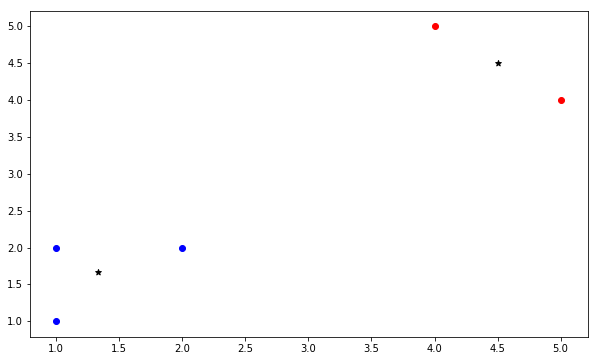

None


In [9]:
plt.figure(figsize: [10, 6])

for i in 0..<dataset.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()

## Kmeans with Kmean++ initializer

In [10]:
let model = KMeans(clusterCount: 2, maximumIterationCount: 100, initializer: "kmean++")
model.fit(data: dataset)
print("Labels: ",model.labels)
print("Inertia: ",model.inertia)
print("Transformation: ",model.transformation(for: dataset))

Labels:  [[0],
 [0],
 [0],
 [1],
 [1]]
Inertia:  2.3333335
Transformation:  [[ 0.7453561,  4.9497476],
 [ 0.4714045,  4.3011627],
 [ 0.7453559,   3.535534],
 [  4.268749, 0.70710677],
 [ 4.3461347, 0.70710677]]


In [11]:
let testdata = Tensor<Float>([[3,4], [2,3], [5, 5]])
model.prediction(for: testdata)

[[1],
 [0],
 [1]]


In [12]:
let y = model.labels.makeNumpyArray()
let centroids = model.centroids.makeNumpyArray()

let dataNP = dataset.makeNumpyArray()
let colors2 = ["red","blue"]

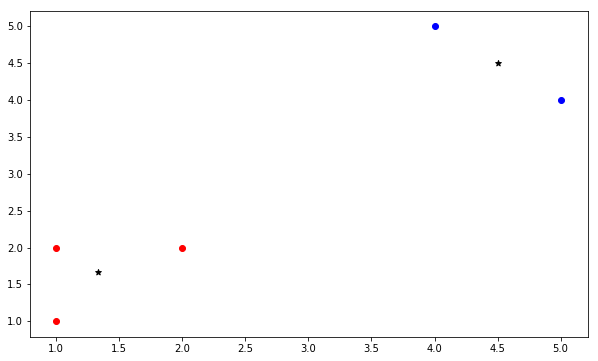

None


In [13]:
plt.figure(figsize: [10, 6])

for i in 0..<dataset.shape[0] {
    let id:Int = Int(y[i][0])!
    plt.scatter(dataNP[i][0], dataNP[i][1], color: colors2[id])
}

for i in 0..<model.centroids.shape[0] {
    plt.scatter(centroids[i][0], centroids[i][1], color: "black", marker: "*")
}

plt.show()